In [1]:
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual,HBox,VBox,Layout
import ipywidgets as widgets
from IPython.display import display
from torch.autograd import Variable
import torch.nn
import matplotlib.pyplot as plt
import numpy as np
path2project = 'C:/GIT/masterthesis_VAE/'
import sys
sys.path.append(path2project)
from models.VAE.VAE import VAE
from general.util.ExperimentLoader import ExperimentLoader
from general.utilPytorch.util_pytorch import load_model
from general.utilPytorch.util_pytorch import get_pytorch_dataloaders
plt.gray()

<Figure size 432x288 with 0 Axes>

In [2]:
#load settigns of trained model
experiment_path = path2project + 'experiments/VAE_07_12PM on November 20, 2019'
experimentloader = ExperimentLoader(path2experiment=experiment_path)
settings = experimentloader.getsettings()

In [3]:
# load datasets
settings["train_dataroot_4imgs"] = path2project + 'KneeXrayData/train'
settings["val_dataroot_4imgs"] = path2project + 'KneeXrayData/val'
_, _, train_data_loader_4imgs, val_data_loader_4imgs = get_pytorch_dataloaders(train_dataroot=None, val_dataroot=None,
    train_dataroot_4imgs=settings["train_dataroot_4imgs"], val_dataroot_4imgs=settings["val_dataroot_4imgs"],
    batch_size=settings["batch_size"], img_dim=256)

In [4]:
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

device = torch.device(device)
#init model and load weights
model = VAE(cdim=1, hdim=settings['latent_space'], channels=settings['channels'], image_size=settings['input_height']).cpu()
load_model(model, experimentloader.get_lowest_mse_train_weights(),device=device)

lowest_mse_train_epoch_293


c:\git\masterthesis_vae\venv\lib\site-packages\torch\serialization.py:671: SourceChangeWarning: source code of class 'models.VAE.VAE.VAE' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
c:\git\masterthesis_vae\venv\lib\site-packages\torch\serialization.py:671: SourceChangeWarning: source code of class 'general.utilPytorch.networks.Encoder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
c:\git\masterthesis_vae\venv\lib\site-packages\torch\serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source

In [5]:
# load images from train data set as numpy array
iterator = iter(train_data_loader_4imgs)
batch, _ = iterator.next()
input_val_4imgs = Variable(batch)
input_val_4imgs = input_val_4imgs.data.cpu().numpy()

In [6]:
# selected image
image_idx = 2
input_img = input_val_4imgs[image_idx,:]
input_img = np.expand_dims(input_img,0)

In [7]:
# test model -> reconstruct input
mu, logvar, z, output_img = model(torch.from_numpy(input_img).cpu())
# get numpy array
output_img = output_img.data.cpu().numpy()
output_img = output_img.squeeze()
logvar = logvar.data.cpu().numpy()
z_var = np.exp(logvar)


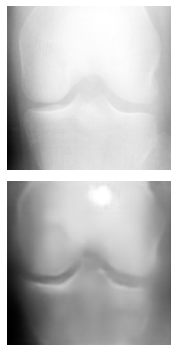

In [8]:
# plot original and reconstrued images
f, ax = plt.subplots(2, figsize=(5, 5))
ax[0].imshow(input_img.reshape(input_img.shape[-2],input_img.shape[-1]))
ax[1].imshow(output_img)
ax[0].axis('off')
ax[1].axis('off')
plt.subplots_adjust(left=0.0, bottom=0, right=0.0001, top=0.0001, wspace=0.001, hspace=.001)
plt.tight_layout()
plt.show()

In [9]:
def interactive_latent_plot(**kwargs):
    
    for key, value in kwargs.items():
        #print ("%s == %s" %(key, value))
        z_interactive[:,int(key)] = value
        
       
    recon_latent = model.decode(torch.from_numpy(z_interactive))
    
    f, ax = plt.subplots(2,figsize=(10, 10))
    ax[0].imshow(output_img)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[1].imshow(recon_latent.data.cpu().numpy().reshape(recon_latent.shape[-2],recon_latent.shape[-1]))
    
    
    plt.show(f)
    return (f)

In [10]:
style = {'description_width': 'initial'}
z_interactive = z.data.cpu().numpy()
print(z_interactive.shape)
n_latent=z_interactive.shape[1]
weight_sliders = []
print('Max variance of latent space: %f' %  z_var.max())
print('Min variance of latent space: %f' %  z_var.min())
print('Max z value: %f' % z_interactive.max())
print('Min z value: %f' % z_interactive.min())
kwargs = {}
'''for i in range(10,20):
    if (z_var[:,i] > 0.0):
        weight_slider = widgets.FloatSlider(value=z_interactive[:,i],min=-1.0,max=1.0,step=0.1,description=r'\(z%d  \sigma=%.5f\)' % (i, z_var[:,i]),style=style,    ) 
        kwargs.update({str(i):weight_slider})
'''#add latent manually
i=1
weight_slider = widgets.FloatSlider(value=z_interactive[:,i],min=-1.0,max=1.0,step=0.1,description=r'\(z%d  \sigma=%.5f\)' % (i, z_var[:,i]),style=style,    ) 
kwargs.update({str(i):weight_slider})

#add latent manually
i=19
weight_slider = widgets.FloatSlider(value=z_interactive[:,i],min=-1.0,max=1.0,step=0.1,description=r'\(z%d  \sigma=%.5f\)' % (i, z_var[:,i]),style=style,    ) 
kwargs.update({str(i):weight_slider})

#add latent manually
i=25
weight_slider = widgets.FloatSlider(value=z_interactive[:,i],min=-1.0,max=1.0,step=0.1,description=r'\(z%d  \sigma=%.5f\)' % (i, z_var[:,i]),style=style,    ) 
kwargs.update({str(i):weight_slider})

#add latent manually
i=38
weight_slider = widgets.FloatSlider(value=z_interactive[:,i],min=-1.0,max=1.0,step=0.1,description=r'\(z%d  \sigma=%.5f\)' % (i, z_var[:,i]),style=style,    ) 
kwargs.update({str(i):weight_slider})


y_widget=interactive(interactive_latent_plot,**kwargs)
controls = HBox(y_widget.children[:-1], layout = Layout(flex_flow='row wrap'))
output = y_widget.children[-1]


print(output)
display(y_widget)

(1, 50)
Max variance of latent space: 0.183961
Min variance of latent space: 0.000314
Max z value: 0.979586
Min z value: -0.991836
Output()


interactive(children=(FloatSlider(value=-0.6559846997261047, description='\\(z1  \\sigma=0.00049\\)', max=1.0,…